In [1]:
import pandas as pd
import seaborn as sns

## Load Dataset

In [2]:
train = pd.read_csv("data/bike/train.csv")

train["datetime"] = pd.to_datetime(train["datetime"])

# train["datetime"].dt.year (month/day/hour/minute/second)

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("data/bike/test.csv")

test["datetime"] = pd.to_datetime(test["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Explore

/Users/Kwan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


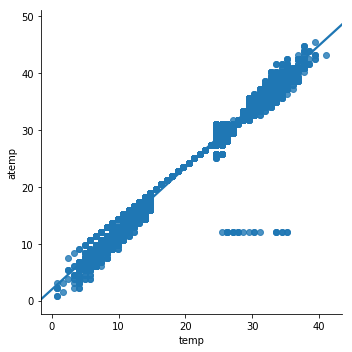

In [4]:
sns.lmplot(data = train, x = "temp", y = "atemp")

/Users/Kwan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


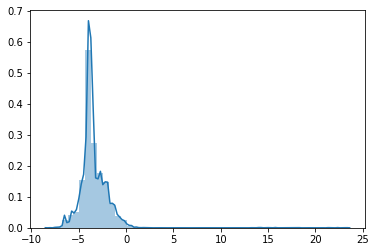

In [5]:
sns.distplot(train["temp"] - train["atemp"]) # Temp와 Atemp Gap 분포 확인

In [6]:
train[train["temp"] - train["atemp"] > 5].shape # atemp 값이 모두 12.12 로 고정. 아마도 측정 오류... atemp값을 gap 평균값인 +3.75 해줌
train.loc[train["temp"] - train["atemp"] > 5, "atemp"] = train[train["temp"] - train["atemp"] > 5]["temp"] + 3.75


In [7]:
test[test["temp"] - test["atemp"] > 5].shape # atemp 값이 모두 12.12 로 고정. 아마도 측정 오류... atemp값을 gap 평균값인 +3.75 해줌
test.loc[test["temp"] - test["atemp"] > 5, "atemp"] = test[test["temp"] - test["atemp"] > 5]["temp"] + 3.75


/Users/Kwan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


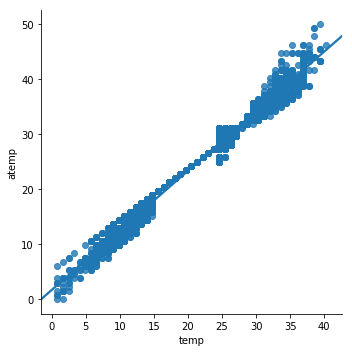

In [8]:
sns.lmplot(data = test, x = "temp", y = "atemp")

/Users/Kwan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


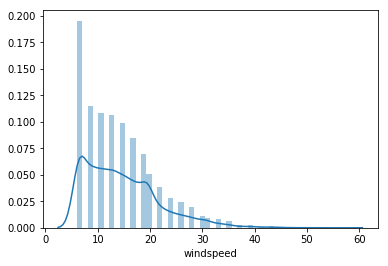

In [9]:
sns.distplot(train[train["windspeed"] != 0]["windspeed"])

In [10]:
train[train["windspeed"] == 0].shape

(1313, 12)

/Users/Kwan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


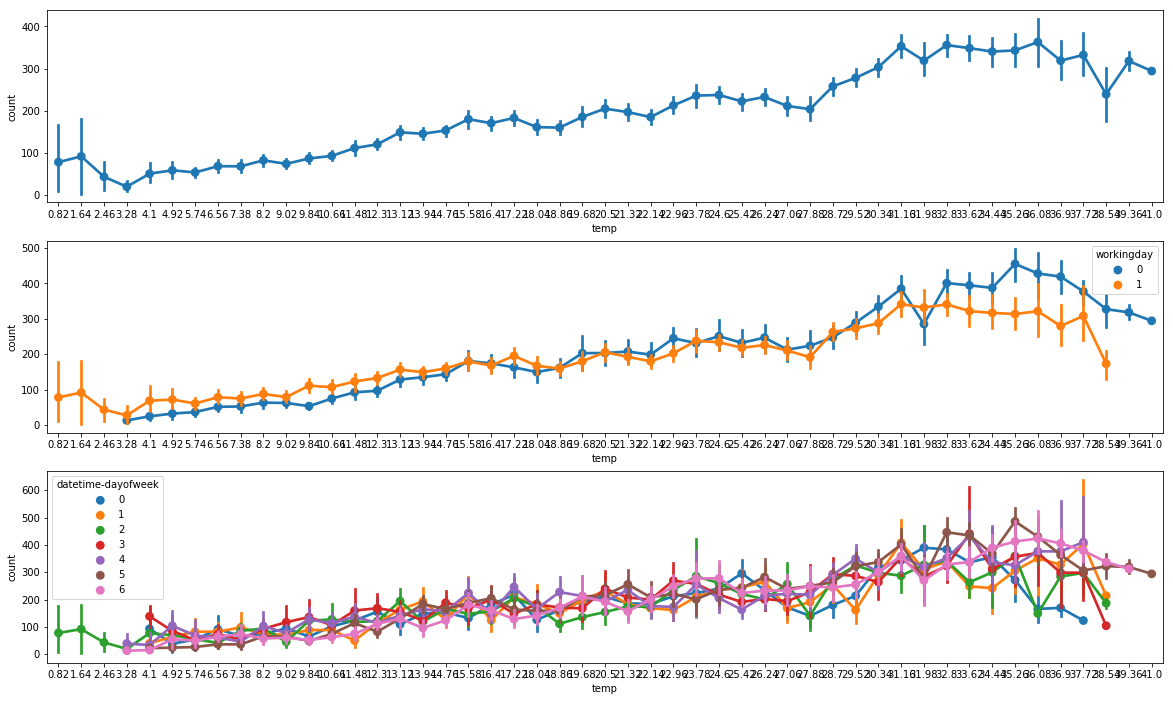

In [157]:
import matplotlib.pyplot as plt
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 3x1로 총 3개의 시각화를 한 화면에 띄웁니다.
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

# 시각화의 전체 사이즈는 18x12로 설정합니다.
figure.set_size_inches(20, 12)

# seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
sns.pointplot(data=train, x="temp", y="count", ax=ax1)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
# 하지만 이번에는 근무일(workingday)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="temp", y="count", hue="workingday", ax=ax2)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
# 하지만 이번에는 요일(datetime-dayofweek)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="temp", y="count", hue="datetime-dayofweek", ax=ax3)

/Users/Kwan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


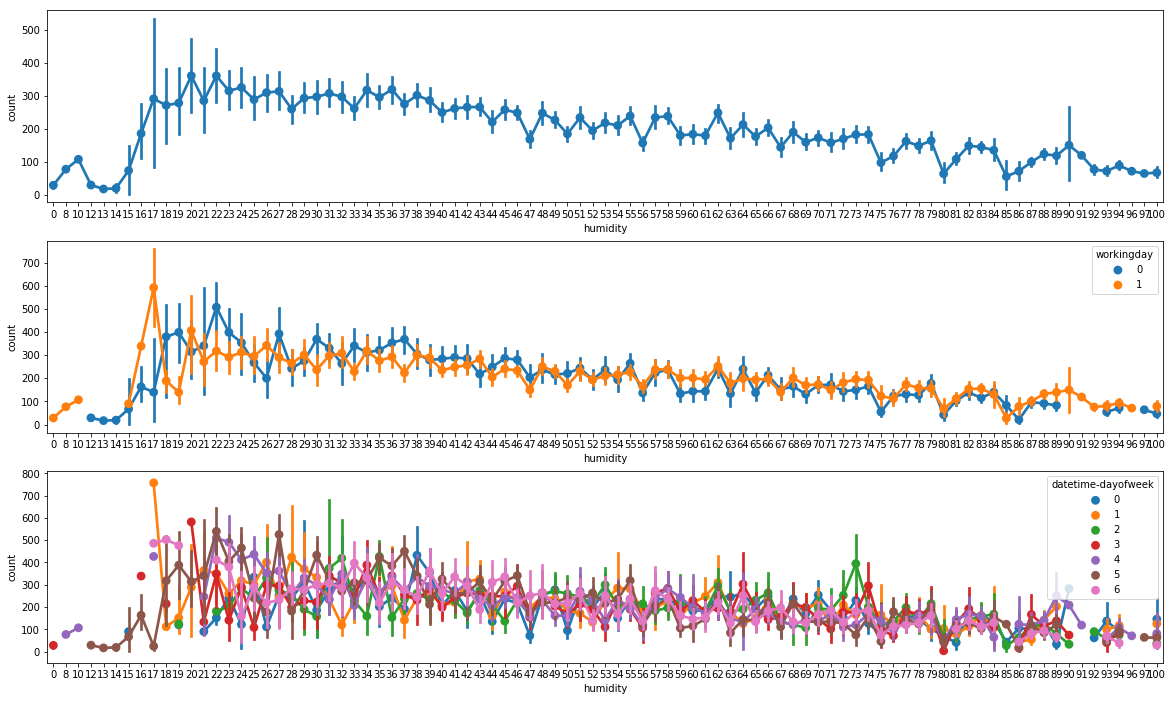

In [176]:
import matplotlib.pyplot as plt
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 3x1로 총 3개의 시각화를 한 화면에 띄웁니다.
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

# 시각화의 전체 사이즈는 18x12로 설정합니다.
figure.set_size_inches(20, 12)

# seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
sns.pointplot(data=train, x="humidity", y="count", ax=ax1)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
# 하지만 이번에는 근무일(workingday)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="humidity", y="count", hue="workingday", ax=ax2)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
# 하지만 이번에는 요일(datetime-dayofweek)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="humidity", y="count", hue="datetime-dayofweek", ax=ax3)

/Users/Kwan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


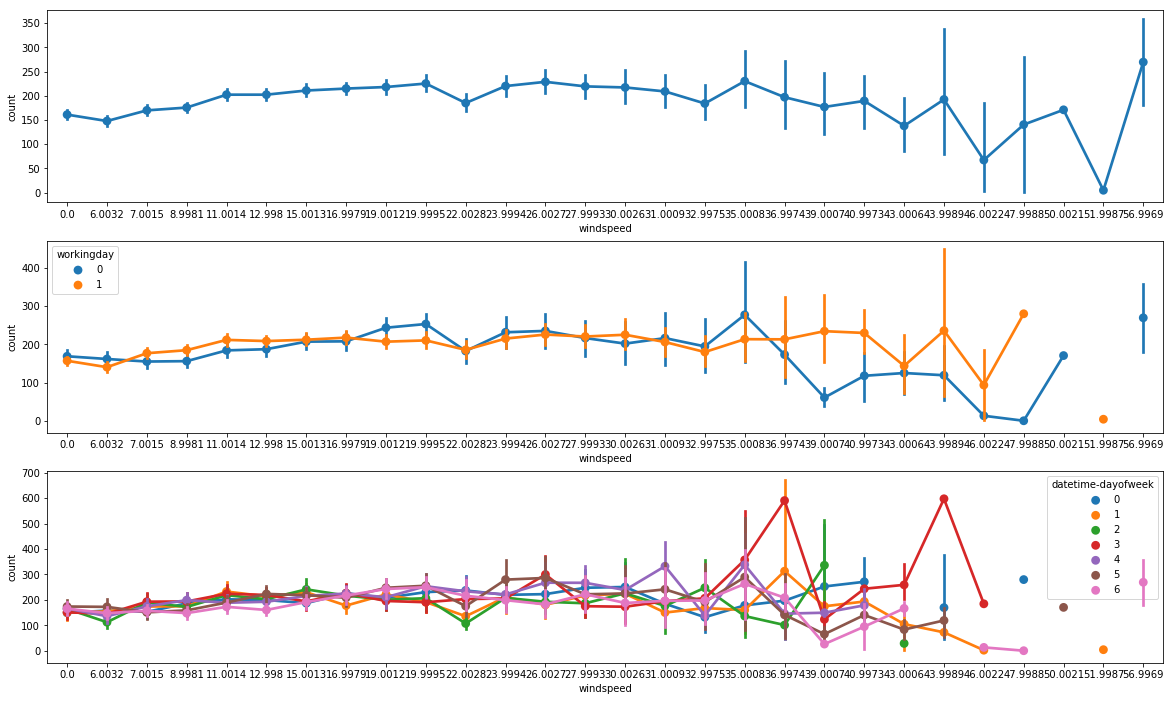

In [254]:
import matplotlib.pyplot as plt
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 3x1로 총 3개의 시각화를 한 화면에 띄웁니다.
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

# 시각화의 전체 사이즈는 18x12로 설정합니다.
figure.set_size_inches(20, 12)

# seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
sns.pointplot(data=train, x="windspeed", y="count", ax=ax1)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
# 하지만 이번에는 근무일(workingday)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="windspeed", y="count", hue="workingday", ax=ax2)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
# 하지만 이번에는 요일(datetime-dayofweek)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="windspeed", y="count", hue="datetime-dayofweek", ax=ax3)

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
5         6.0032
6         0.0000
7         0.0000
8         0.0000
9         0.0000
10       16.9979
11       19.0012
12       19.0012
13       19.9995
14       19.0012
15       19.9995
16       19.9995
17       19.0012
18       16.9979
19       16.9979
20       16.9979
21       12.9980
22       15.0013
23       19.9995
24       19.9995
25       16.9979
26       19.0012
27       12.9980
28       12.9980
29       19.9995
          ...   
10856    22.0028
10857    26.0027
10858    16.9979
10859    15.0013
10860     0.0000
10861     6.0032
10862     0.0000
10863     6.0032
10864     6.0032
10865     8.9981
10866     8.9981
10867     6.0032
10868     6.0032
10869     8.9981
10870     7.0015
10871     7.0015
10872     7.0015
10873    15.0013
10874    19.0012
10875    12.9980
10876    12.9980
10877    19.0012
10878    23.9994
10879    26.0027
10880    23.9994
10881    26.0027
10882    15.0013
10883    15.00

## Preprocessing

In [65]:
## date 처리
# 연/월/시간 추가
# train["datetime"].dt.year (month/day/hour/minute/second)

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["hour"] = train["datetime"].dt.hour

train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

train["mon"] = train["datetime-dayofweek"] == 0
train["tue"] = train["datetime-dayofweek"] == 1
train["wed"] = train["datetime-dayofweek"] == 2
train["thu"] = train["datetime-dayofweek"] == 3
train["fri"] = train["datetime-dayofweek"] == 4
train["sat"] = train["datetime-dayofweek"] == 5
train["sun"] = train["datetime-dayofweek"] == 6

print(train.shape)
train.head()

(10886, 31)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,light,heavy,datetime-dayofweek,mon,tue,wed,thu,fri,sat,sun
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,False,False,5,False,False,False,False,False,True,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,False,False,5,False,False,False,False,False,True,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,False,False,5,False,False,False,False,False,True,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,False,False,5,False,False,False,False,False,True,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,False,False,5,False,False,False,False,False,True,False


In [66]:
# Test 데이터 시간 처리

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour

test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

test["mon"] = test["datetime-dayofweek"] == 0
test["tue"] = test["datetime-dayofweek"] == 1
test["wed"] = test["datetime-dayofweek"] == 2
test["thu"] = test["datetime-dayofweek"] == 3
test["fri"] = test["datetime-dayofweek"] == 4
test["sat"] = test["datetime-dayofweek"] == 5
test["sun"] = test["datetime-dayofweek"] == 6

print(test.shape)
test.head()

(6493, 28)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,...,light,heavy,datetime-dayofweek,mon,tue,wed,thu,fri,sat,sun
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,False,False,3,False,False,False,True,False,False,False
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,False,False,3,False,False,False,True,False,False,False
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,False,False,3,False,False,False,True,False,False,False
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,False,False,3,False,False,False,True,False,False,False
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,False,False,3,False,False,False,True,False,False,False


In [67]:
# Season One Hot Encoding
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
train["spring"] = train["season"] == 1
train["summer"] = train["season"] == 2
train["fall"] = train["season"] == 3
train["winter"] = train["season"] == 4

train[["season", "spring", "summer", "fall", "winter"]].head()

,season,spring,summer,fall,winter
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


In [68]:
# Season One Hot Encoding
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
test["spring"] = test["season"] == 1
test["summer"] = test["season"] == 2
test["fall"] = test["season"] == 3
test["winter"] = test["season"] == 4

test[["season", "spring", "summer", "fall", "winter"]].head()

,season,spring,summer,fall,winter
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


In [177]:
# Weather One Hot Encoding
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
train["pleasant"] = train["weather"] == 1
train["mild"] = train["weather"] == 2
train["light"] = train["weather"] == 3
train["heavy"] = train["weather"] == 4

train[["weather", "pleasant", "mild", "light", "heavy"]].head()

,weather,pleasant,mild,light,heavy
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


In [178]:
# Weather One Hot Encoding
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

test["pleasant"] = test["weather"] == 1
test["mild"] = test["weather"] == 2
test["light"] = test["weather"] == 3
test["heavy"] = test["weather"] == 4

test[["weather", "pleasant", "mild", "light", "heavy"]].head()

,weather,pleasant,mild,light,heavy
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


In [179]:
## weekend
non_holiday = train["holiday"] == 0
non_workingday = train["workingday"] == 0

train.loc[non_holiday & non_workingday, "weekend"] = 1
train.loc[~(non_holiday & non_workingday), "weekend"] = 0

# train["weekend"] = train[non_holiday & non_workingday] 

print(train.shape)
train.head()

(10886, 35)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,tue,wed,thu,fri,sat,sun,weekend,datetime-year(str),datetime-month(str),datetime-year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,False,False,False,False,True,False,1.0,2011,1,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,False,False,False,False,True,False,1.0,2011,1,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,False,False,False,False,True,False,1.0,2011,1,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,False,False,False,False,True,False,1.0,2011,1,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,False,False,False,False,True,False,1.0,2011,1,2011-1


In [180]:
## weekend
non_holiday = test["holiday"] == 0
non_workingday = test["workingday"] == 0

test.loc[non_holiday & non_workingday, "weekend"] = 1
test.loc[~(non_holiday & non_workingday), "weekend"] = 0

# test["weekend"] = test[non_holiday & non_workingday] 

print(test.shape)
test.head()

(6493, 32)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,...,tue,wed,thu,fri,sat,sun,weekend,datetime-year(str),datetime-month(str),datetime-year_month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,False,False,True,False,False,False,0.0,2011,1,2011-1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,False,False,True,False,False,False,0.0,2011,1,2011-1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,False,False,True,False,False,False,0.0,2011,1,2011-1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,False,False,True,False,False,False,0.0,2011,1,2011-1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,False,False,True,False,False,False,0.0,2011,1,2011-1


In [226]:
train[["datetime","windspeed"]].head()

,datetime,windspeed
0,2011-01-01 00:00:00,0.0
1,2011-01-01 01:00:00,0.0
2,2011-01-01 02:00:00,0.0
3,2011-01-01 03:00:00,0.0
4,2011-01-01 04:00:00,0.0


In [133]:
# datetime-year와 datetime-month의 형태를 변환합니다.
# 이전까지는 정수형(int)였지만, pandas의 astype을 통해 문자열(str)로 변환합니다.
# 이 결과를 datetime-year(str)와 datetime-month(str)라는 새로운 컬럼에 집어넣습니다.
train["datetime-year(str)"] = train["year"].astype('str')
train["datetime-month(str)"] = train["month"].astype('str')

# datetime-year(str)와 datetime-month(str) 문자열 두 개를 붙여서 datetime-year_month라는 새로운 컬럼을 추가합니다.
# 이 컬럼에는 2011-1부터 2012-12까지의 총 24의 경우의 수가 들어갑니다.
train["datetime-year_month"] = train["datetime-year(str)"] + "-" + train["datetime-month(str)"]

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head() train 데이터의 상위 5개를 띄우되,
# datetime과 datetime-year_month 두 개의 컬럼만 출력합니다.
train[["datetime", "datetime-year_month"]].head()

(10886, 35)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [364]:
# datetime-year와 datetime-month의 형태를 변환합니다.
# 이전까지는 정수형(int)였지만, pandas의 astype을 통해 문자열(str)로 변환합니다.
# 이 결과를 datetime-year(str)와 datetime-month(str)라는 새로운 컬럼에 집어넣습니다.
train["datetime-year(str)"] = train["year"].astype('str')
train["datetime-month(str)"] = train["month"].astype('str')

# datetime-year(str)와 datetime-month(str) 문자열 두 개를 붙여서 datetime-year_month라는 새로운 컬럼을 추가합니다.
# 이 컬럼에는 2011-1부터 2012-12까지의 총 24의 경우의 수가 들어갑니다.
train["datetime-year_month"] = train["datetime-year(str)"] + "-" + train["datetime-month(str)"]

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head() train 데이터의 상위 5개를 띄우되,
# datetime과 datetime-year_month 두 개의 컬럼만 출력합니다.
train[["datetime", "datetime-year_month"]].head()

train["2011-01"] = train["datetime-year_month"] == "2011-1"
train["2011-02"] = train["datetime-year_month"] == "2011-2"
train["2011-03"] = train["datetime-year_month"] == "2011-3"
train["2011-04"] = train["datetime-year_month"] == "2011-4"
train["2011-05"] = train["datetime-year_month"] == "2011-5"
train["2011-06"] = train["datetime-year_month"] == "2011-6"
train["2011-07"] = train["datetime-year_month"] == "2011-7"
train["2011-08"] = train["datetime-year_month"] == "2011-8"
train["2011-09"] = train["datetime-year_month"] == "2011-9"
train["2011-10"] = train["datetime-year_month"] == "2011-10"
train["2011-11"] = train["datetime-year_month"] == "2011-11"
train["2011-12"] = train["datetime-year_month"] == "2011-12"
train["2012-01"] = train["datetime-year_month"] == "2012-1"
train["2012-02"] = train["datetime-year_month"] == "2012-2"
train["2012-03"] = train["datetime-year_month"] == "2012-3"
train["2012-04"] = train["datetime-year_month"] == "2012-4"
train["2012-05"] = train["datetime-year_month"] == "2012-5"
train["2012-06"] = train["datetime-year_month"] == "2012-6"
train["2012-07"] = train["datetime-year_month"] == "2012-7"
train["2012-08"] = train["datetime-year_month"] == "2012-8"
train["2012-09"] = train["datetime-year_month"] == "2012-9"
train["2012-10"] = train["datetime-year_month"] == "2012-10"
train["2012-11"] = train["datetime-year_month"] == "2012-11"
train["2012-12"] = train["datetime-year_month"] == "2012-12"

(10886, 35)


In [365]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,False,False,False,False,False,False,False,False,False,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,False,False,False,False,False,False,False,False,False,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,False,False,False,False,False,False,False,False,False,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,False,False,False,False,False,False,False,False,False,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,False,False,False,False,False,False,False,False,False,False
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,...,False,False,False,False,False,False,False,False,False,False
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,...,False,False,False,False,False,False,False,False,False,False
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,...,False,False,False,False,False,False,False,False,False,False
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,...,False,False,False,False,False,False,False,False,False,False
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,...,False,False,False,False,False,False,False,False,False,False


In [383]:
# datetime-year와 datetime-month의 형태를 변환합니다.
# 이전까지는 정수형(int)였지만, pandas의 astype을 통해 문자열(str)로 변환합니다.
# 이 결과를 datetime-year(str)와 datetime-month(str)라는 새로운 컬럼에 집어넣습니다.
test["datetime-year(str)"] = test["year"].astype('str')
test["datetime-month(str)"] = test["month"].astype('str')

# datetime-year(str)와 datetime-month(str) 문자열 두 개를 붙여서 datetime-year_month라는 새로운 컬럼을 추가합니다.
# 이 컬럼에는 2011-1부터 2012-12까지의 총 24의 경우의 수가 들어갑니다.
test["datetime-year_month"] = test["datetime-year(str)"] + "-" + test["datetime-month(str)"]

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head() train 데이터의 상위 5개를 띄우되,
# datetime과 datetime-year_month 두 개의 컬럼만 출력합니다.
test[["datetime", "datetime-year_month"]].head()

test["2011-01"] = test["datetime-year_month"] == "2011-1"
test["2011-02"] = test["datetime-year_month"] == "2011-2"
test["2011-03"] = test["datetime-year_month"] == "2011-3"
test["2011-04"] = test["datetime-year_month"] == "2011-4"
test["2011-05"] = test["datetime-year_month"] == "2011-5"
test["2011-06"] = test["datetime-year_month"] == "2011-6"
test["2011-07"] = test["datetime-year_month"] == "2011-7"
test["2011-08"] = test["datetime-year_month"] == "2011-8"
test["2011-09"] = test["datetime-year_month"] == "2011-9"
test["2011-10"] = test["datetime-year_month"] == "2011-10"
test["2011-11"] = test["datetime-year_month"] == "2011-11"
test["2011-12"] = test["datetime-year_month"] == "2011-12"
test["2012-01"] = test["datetime-year_month"] == "2012-1"
test["2012-02"] = test["datetime-year_month"] == "2012-2"
test["2012-03"] = test["datetime-year_month"] == "2012-3"
test["2012-04"] = test["datetime-year_month"] == "2012-4"
test["2012-05"] = test["datetime-year_month"] == "2012-5"
test["2012-06"] = test["datetime-year_month"] == "2012-6"
test["2012-07"] = test["datetime-year_month"] == "2012-7"
test["2012-08"] = test["datetime-year_month"] == "2012-8"
test["2012-09"] = test["datetime-year_month"] == "2012-9"
test["2012-10"] = test["datetime-year_month"] == "2012-10"
test["2012-11"] = test["datetime-year_month"] == "2012-11"
test["2012-12"] = test["datetime-year_month"] == "2012-12"

(6493, 56)


### Train

In [384]:
feature_names = ["workingday","atemp","humidity","year","hour","spring","summer","fall","winter","pleasant","mild","light","heavy","mon","tue","wed","thu","fri","sat","sun","weekend"]
feature_names

['workingday',
 'atemp',
 'humidity',
 'year',
 'hour',
 'spring',
 'summer',
 'fall',
 'winter',
 'pleasant',
 'mild',
 'light',
 'heavy',
 'mon',
 'tue',
 'wed',
 'thu',
 'fri',
 'sat',
 'sun',
 'weekend',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12']

In [385]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()


(10886, 45)


,workingday,atemp,humidity,year,hour,spring,summer,fall,winter,pleasant,...,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12
0,0,14.395,81,2011,0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,13.635,80,2011,1,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0,13.635,80,2011,2,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0,14.395,75,2011,3,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,14.395,75,2011,4,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [386]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()


(6493, 45)


,workingday,atemp,humidity,year,hour,spring,summer,fall,winter,pleasant,...,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12
0,1,11.365,56,2011,0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1,13.635,56,2011,1,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1,13.635,56,2011,2,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1,12.880,56,2011,3,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1,12.880,56,2011,4,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [387]:
label_name = "count"

Y_train = train[label_name]

print(Y_train.shape)
Y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

### Use Decision Tree

In [388]:

#from sklearn.tree import DecisionTreeRegressor
#
#model = DecisionTreeRegressor(random_state = 37)
#model


### Random Forest

Random Forest

- Sampling을 하고 이 Sample로 Decision Tree를 만든다
- 해당 작업을 반복하고, 투표를 통해 가장 효율적인 알고리즘을 만든다.

In [389]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 37, min_samples_split = 3, min_samples_leaf = 3, min_impurity_split=3, n_estimators=15)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=3,
           min_samples_leaf=3, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

## Evaluate

In [390]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, Y_train, cv = 20)

print(y_predict.shape)

y_predict


/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarni

/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarni

/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarni

/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarni

/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarni

/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarni

/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarni

/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarni

(10886,)


/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarni

array([ 34.9657672 ,  28.6400938 ,  18.18838624, ..., 193.77730159,
       168.40909091, 125.88992063])

In [391]:
# Mean Absolute Error
# score = abs(y_predict - Y_train).mean()

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# score = mean_absolute_error(Y_train, y_predict)
score = mean_squared_log_error(Y_train, y_predict)
# score = mean_squared_error(Y_train, y_predict)
score



0.14360212662883892

#### Root Mean Squared Logarithmic Error (RMSLE)

In [392]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

score = mean_squared_log_error(Y_train, y_predict)
score = np.sqrt(score)

# "score = {: .5f}".format(score)

f"score = {score: .5f}"

'score =  0.37895'

In [393]:
# 'score =  0.37895'

In [394]:
model.fit(X_train, Y_train)

/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/Kwan/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarni

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=3,
           min_samples_leaf=3, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [396]:
model.predict(X_test)

array([ 10.37160414,   4.64102075,   3.91329585, ..., 126.26436508,
        98.77150794,  54.10534392])

In [397]:
predictions = model.predict(X_test)

In [398]:
print(predictions.shape)
predictions

(6493,)


array([ 10.37160414,   4.64102075,   3.91329585, ..., 126.26436508,
        98.77150794,  54.10534392])

### Submit

In [399]:
submit = pd.read_csv("data/bike/sampleSubmission.csv")

submit["count"] = predictions
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.371604
1,2011-01-20 01:00:00,4.641021
2,2011-01-20 02:00:00,3.913296
3,2011-01-20 03:00:00,2.424694
4,2011-01-20 04:00:00,2.424694


In [400]:
submit.to_csv("data/bike/Submission_RandomForestWeek4.csv", index = False)